In [214]:
# Import Library
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Data Splitting
from sklearn.model_selection import train_test_split 

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Missing Values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Binning
from sklearn.preprocessing import KBinsDiscretizer

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Column Transfornmer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

# Modeling
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_validate

# Joblib
import joblib

# SHAP
import shap

# PDP
from sklearn.inspection import PartialDependenceDisplay

# Metrics
from sklearn.metrics import get_scorer_names
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score


> # **Background & Context**

> **Background**

> **Problem Statements**

> **Project Objectives**

> **Stakeholders**

> **Features**

> # **Data Loading**

In [215]:
df = pd.read_csv('data_california_house.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

In [216]:
df_copy = df.copy()
df_copy.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

> # **EDA & Data Cleaning**

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [218]:
df.shape

(14448, 10)

In [219]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [220]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [221]:
num_cols = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
num_cols

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [222]:
cat_cols = ['ocean_proximity']
cat_cols

['ocean_proximity']

In [301]:
df['median_income'].min()

0.4999

In [223]:
column_names = list(df.columns)

unique_values = []
for column in df.columns:
    unique_values.append(df[column].unique())

unique_values_df = pd.DataFrame({
    'Column Name': column_names,
    'Unique Values': unique_values
})

pd.set_option('display.max_colwidth', None)
unique_values_df

Column Name  \
0           longitude   
1            latitude   
2  housing_median_age   
3         total_rooms   
4      total_bedrooms   
5          population   
6          households   
7       median_income   
8     ocean_proximity   
9  median_house_value   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Values  
0                                                                                         [-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]  
1                                                                                                                                                                                                                                                                                                   [36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.

In [224]:
df.duplicated().sum()

0

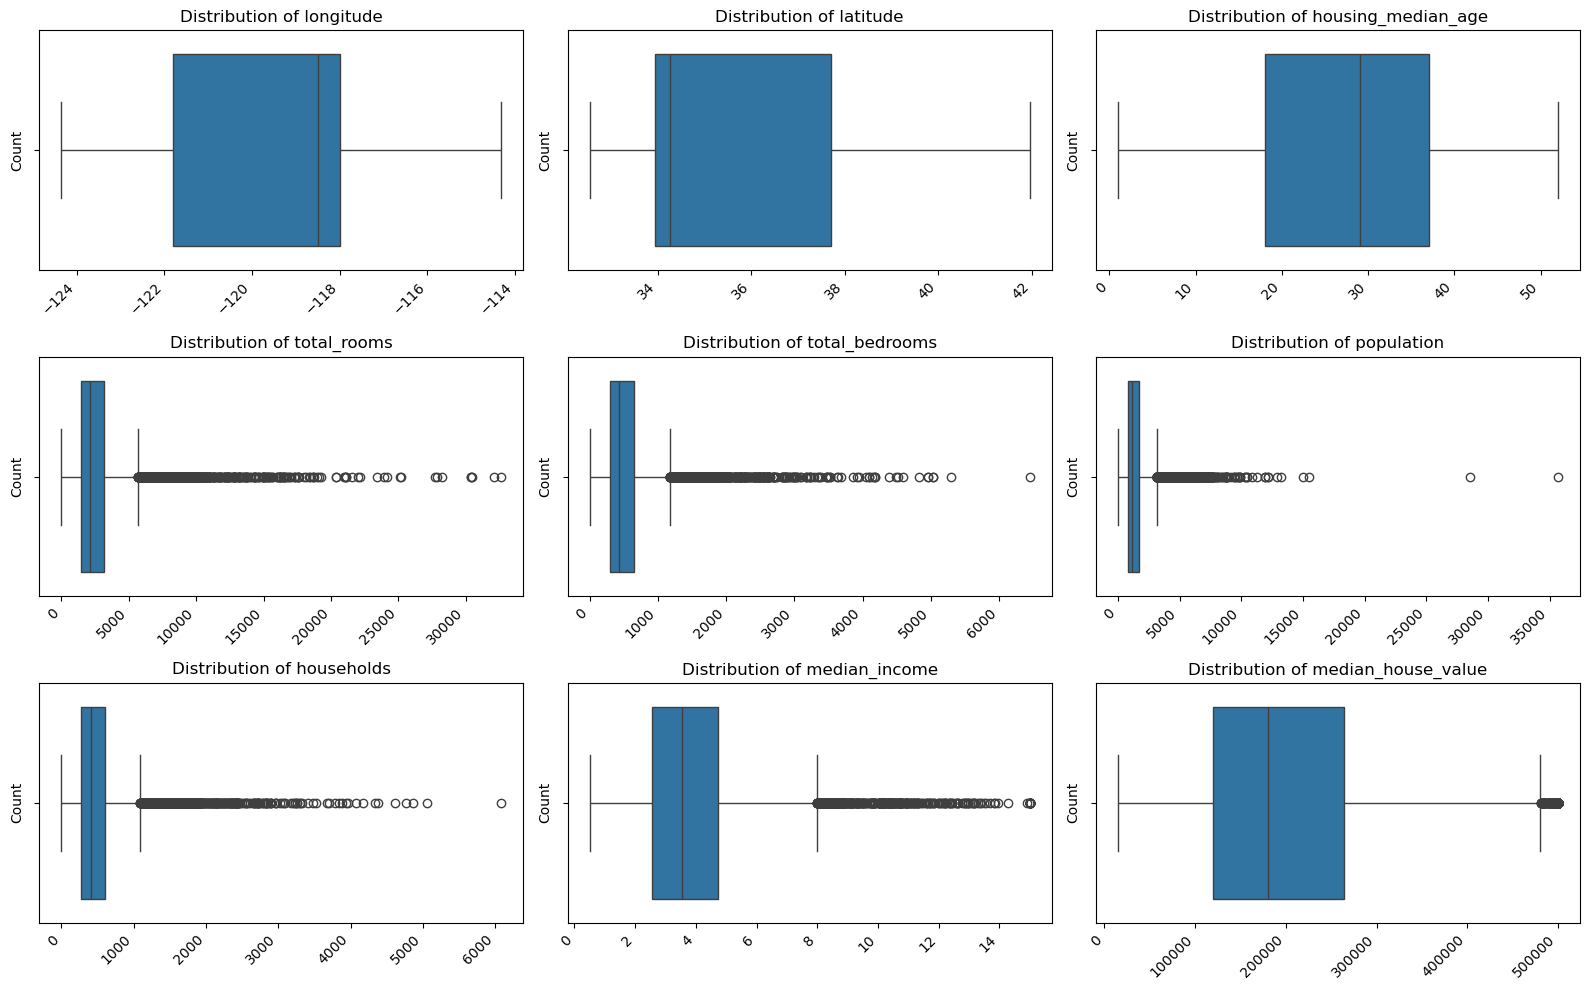

In [225]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df, x=col)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

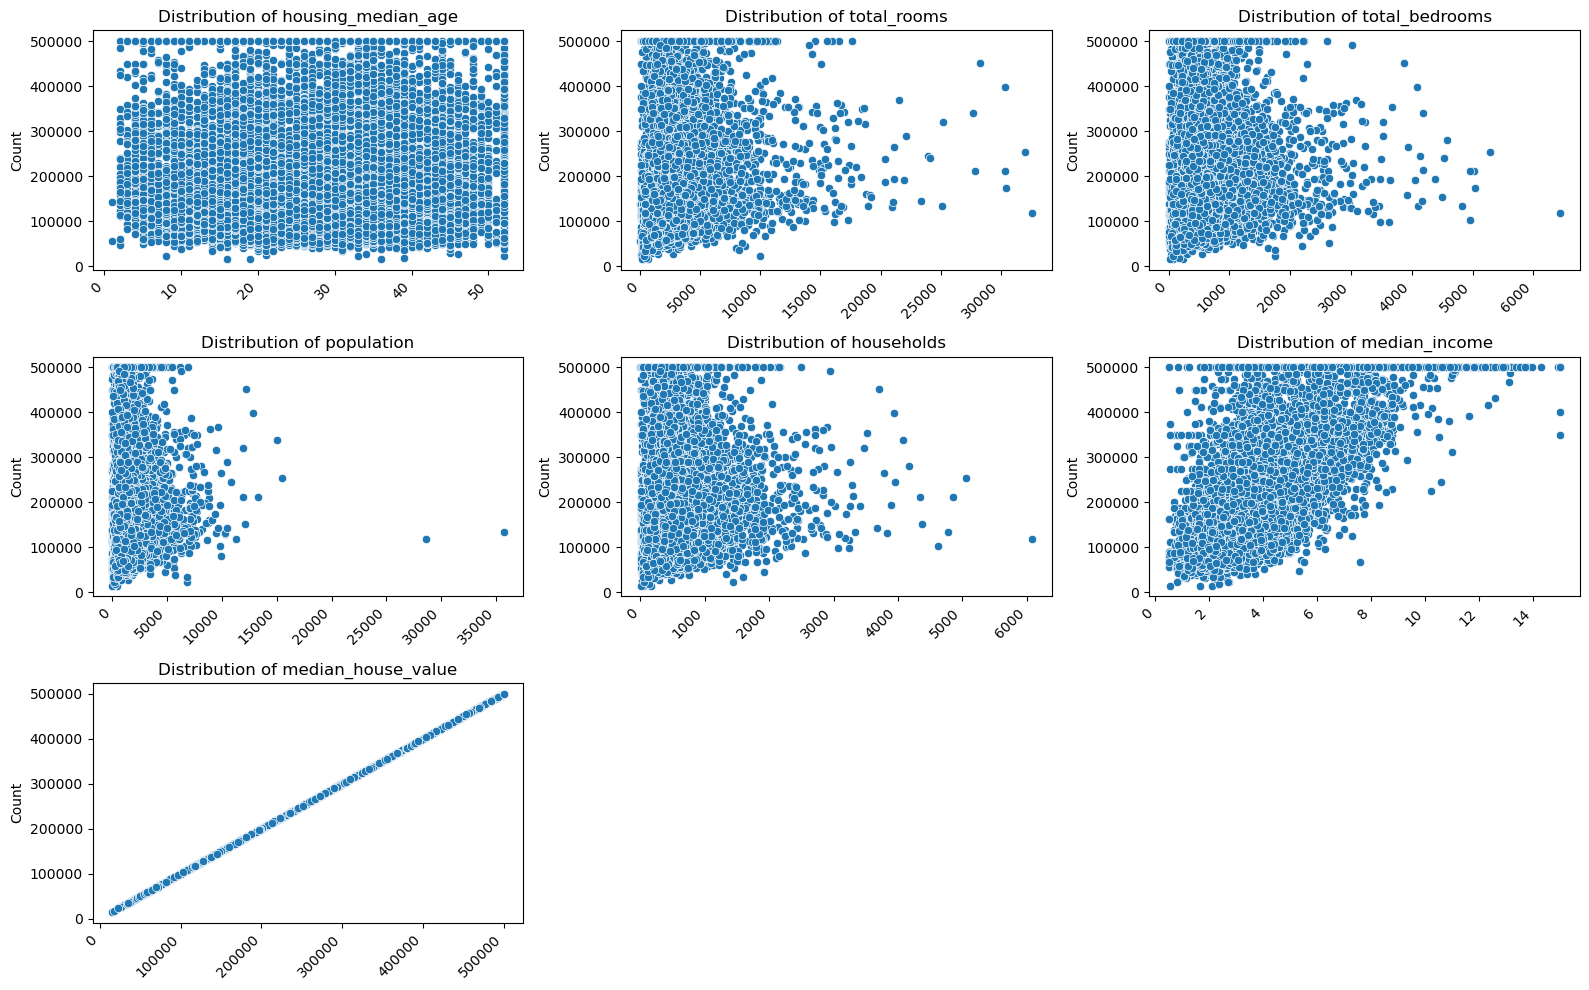

In [226]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(df[num_cols].columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y='median_house_value')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

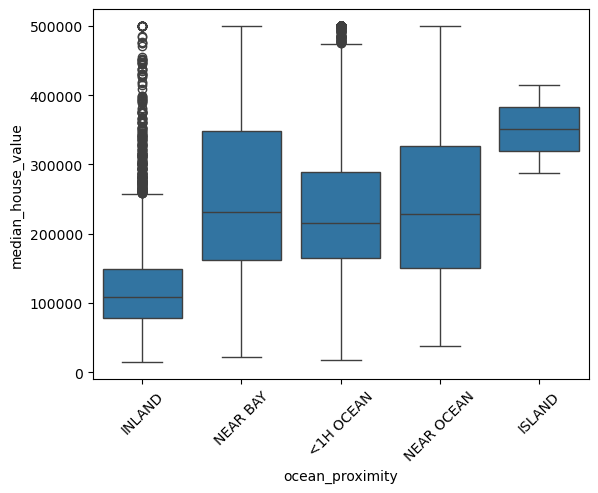

In [227]:
sns.boxplot(df, x='ocean_proximity', y='median_house_value')
plt.xticks(rotation=45)
plt.show()

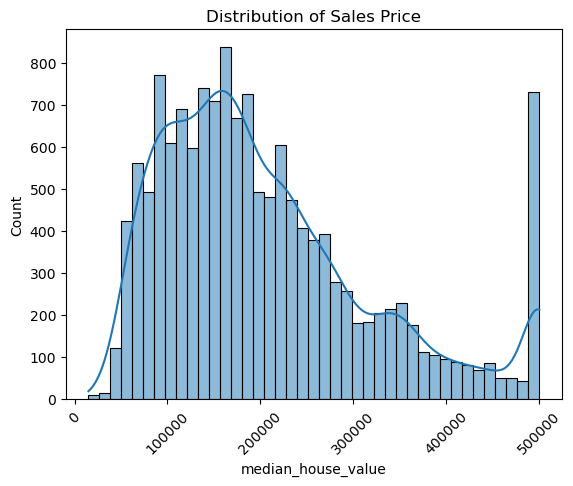

In [228]:
sns.histplot(df, x='median_house_value', kde=True)
plt.title(f'Distribution of Sales Price')
plt.xticks(rotation=45)
plt.show()

In [229]:
shapiro_stat, shapiro_p = stats.shapiro(df['median_house_value'])
if shapiro_p < 0.05:
    print(f"Shapiro-Wilk Test: Stat={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    print("Sale Price is NOT normally distributed.")
else:
    print(f"Shapiro-Wilk Test: Stat={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    print("Sale Price is normally distributed.")

Shapiro-Wilk Test: Stat=0.9118, p-value=0.0000
Sale Price is NOT normally distributed.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14448.
  res = hypotest_fun_out(*samples, **kwds)


In [230]:
sale_price_skewness = df['median_house_value'].skew()
if sale_price_skewness > 0:
    skew_type = "right-skewed"
elif sale_price_skewness < 0:
    skew_type = "left-skewed"

print(f"Skewness: {sale_price_skewness:.4f}, Type: {skew_type}")

Skewness: 0.9818, Type: right-skewed


Text(0.5, 1.0, 'Correlation Matrix')

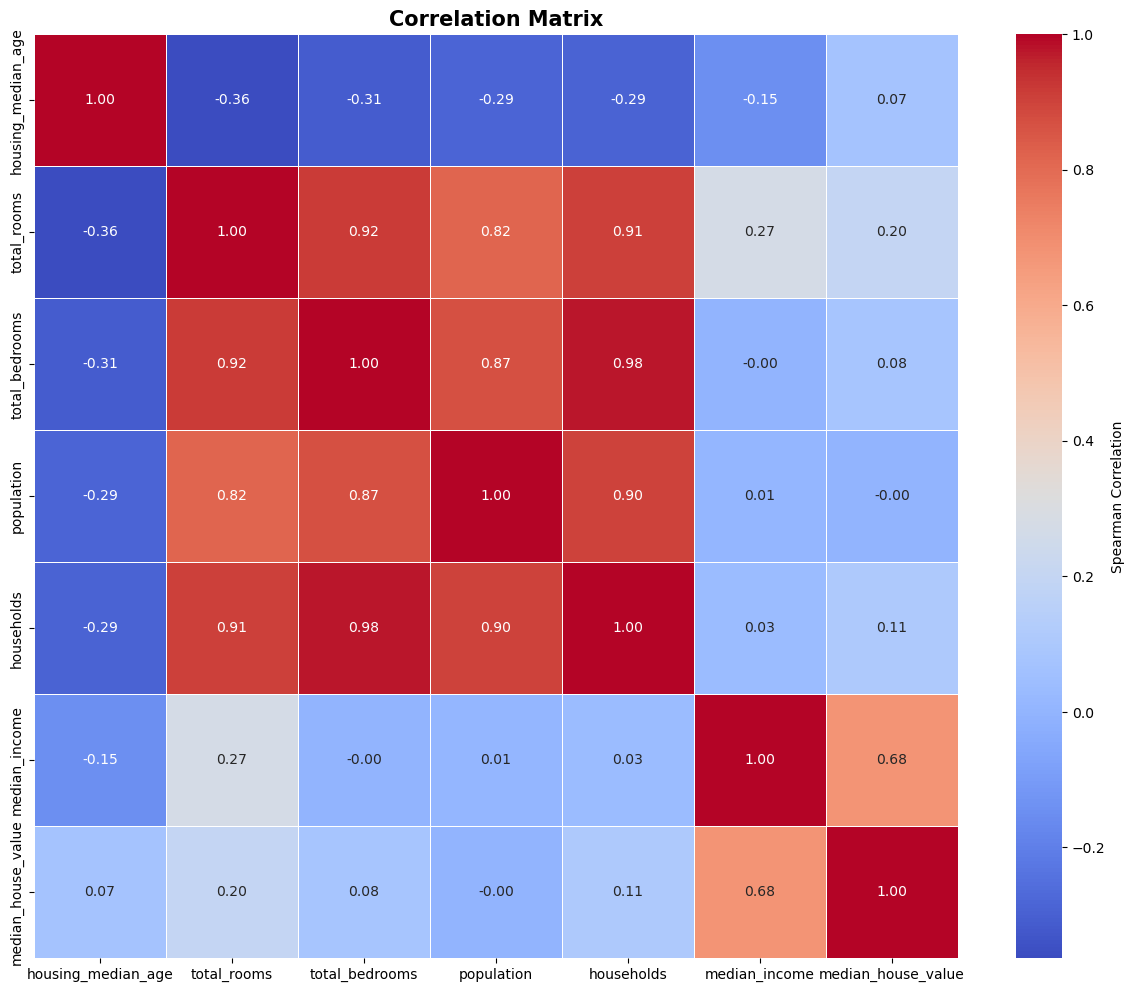

In [231]:
cols_corr= df[num_cols]

plt.figure(figsize=(15, 12))
corr = cols_corr.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5,
            cbar_kws={'label': 'Spearman Correlation'}, annot_kws={'size': 10}, xticklabels=corr.columns, yticklabels=corr.columns)

plt.title('Correlation Matrix', size=15, weight='bold')

> # **Data Splitting**

In [232]:
X = df.drop(columns='median_house_value')
X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14443    -121.26     38.27                20.0       1314.0           229.0   
14444    -120.89     37.48                27.0       1118.0           195.0   
14445    -121.90     36.58                31.0       1431.0             NaN   
14446    -117.93     33.62                34.0       2125.0           498.0   
14447    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  
0           193.0        40.0         1.9750          INLAND  
1           836.0       277.0         2.2604        NEAR BAY  
2          1387.0       364.0         6.2990       <1H OCEAN  
3          3051.0      1000.0         1.7199       <1H OCEAN  
4           606.0       167.0         2.2206          INLAND  
...           ...         ...            ...             ...  
14443       712.0       219.0         4.4125          INLAND  
14444       647.0       209.0         2.9135          INLAND  
14445       704.0       393.0         3.1977      NEAR OCEAN  
14446      1052.0       468.0         5.6315       <1H OCEAN  
14447      1024.0       298.0         1.3882          INLAND  

[14448 rows x 9 columns]

In [233]:
y = df['median_house_value']
y

0         47500.0
1        100000.0
2        285800.0
3        175000.0
4         59200.0
           ...   
14443    144600.0
14444    159400.0
14445    289300.0
14446    484600.0
14447     69400.0
Name: median_house_value, Length: 14448, dtype: float64

In [234]:
y_df = pd.DataFrame(y)
y_df

median_house_value
0                 47500.0
1                100000.0
2                285800.0
3                175000.0
4                 59200.0
...                   ...
14443            144600.0
14444            159400.0
14445            289300.0
14446            484600.0
14447             69400.0

[14448 rows x 1 columns]

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size = 0.20,
                                                random_state = 42)

> # **Data Preprocessing**

In [236]:
encode_map = [{
        'col': 'ocean_proximity', 
        'mapping': {
            'INLAND': 1,
            '<1H OCEAN': 2,
            'NEAR BAY': 3,
            'NEAR OCEAN': 4,
            'ISLAND': 5
        }}]


In [237]:
ordinal_scaler = Pipeline(
    [('ordinal',OrdinalEncoder(encode_map)),
    ('MinMaxScaler', MinMaxScaler())]
)

In [238]:
simple_imputer = Pipeline(
    [('imputer', SimpleImputer(strategy='median')),
     ('scaler', RobustScaler())]
)

In [239]:
transformers = ColumnTransformer([
    ('simple_imputer', simple_imputer, ['total_bedrooms']),
    ('ordinal_scaler', ordinal_scaler, ['ocean_proximity']),
    
    ('robust', RobustScaler(), ['housing_median_age', 'total_rooms',
                                'population', 'households', 'median_income'])
    ],
     remainder='passthrough'
)

transformers

ColumnTransformer(remainder='passthrough',
                  transformers=[('simple_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['total_bedrooms']),
                                ('ordinal_scaler',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(verbose=[{'col': 'ocean_proximity',
                                                                           'mapping': {'<1H OCEAN': 2,
                                                                                       'INLAND': 1,
                                                                                       'ISLAND': 5,
                                                                                       'NEAR BAY': 3,
                                                                                       'NEAR OCEAN': 4}}])),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler())]),
                                 ['ocean_proximity']),
                                ('robust', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'population', 'households',
                                  'median_income'])])

In [240]:
X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

In [241]:
feature_names_out = transformers.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names_out)
X_train_transformed_df

simple_imputer__total_bedrooms  ordinal_scaler__ocean_proximity  \
0                            1.422857                         0.000000   
1                           -0.660000                         0.333333   
2                            1.545714                         0.666667   
3                            4.128571                         0.000000   
4                            0.085714                         0.333333   
...                               ...                              ...   
11553                       -0.608571                         0.000000   
11554                        0.691429                         0.000000   
11555                       -0.314286                         0.000000   
11556                       -0.237143                         0.666667   
11557                        0.660000                         0.333333   

       robust__housing_median_age  robust__total_rooms  robust__population  \
0                        0.052632             0.837073            2.731137   
1                       -0.578947            -0.691010           -0.832094   
2                       -0.894737             1.042382            0.554729   
3                       -0.684211             3.425722            2.764081   
4                        0.368421             0.225253            0.062699   
...                           ...                  ...                 ...   
11553                   -0.263158            -0.234639           -0.489904   
11554                    0.157895             0.798944            0.581296   
11555                    1.105263            -0.369556           -0.178533   
11556                    0.315789             0.043408           -0.236982   
11557                   -0.421053             0.817715            0.551541   

       robust__households  robust__median_income  remainder__longitude  \
0                1.432927              -0.157075               -118.41   
1               -0.618902              -0.623761               -121.59   
2                1.469512               0.275693               -117.26   
3                4.250000              -0.262997               -117.04   
4                0.195122              -0.345195               -119.76   
...                   ...                    ...                   ...   
11553           -0.582317               1.624131               -117.84   
11554            0.728659               0.521870               -118.32   
11555           -0.265244              -0.103420               -118.14   
11556           -0.161585               0.644936               -117.19   
11557            0.746951              -0.191780               -121.16   

       remainder__latitude  
0                    34.00  
1                    39.78  
2                    32.98  
3                    32.77  
4                    36.77  
...                    ...  
11553                33.90  
11554                33.86  
11555                34.18  
11556                32.82  
11557                38.68  

[11558 rows x 9 columns]

In [242]:
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names_out)
X_test_transformed_df

simple_imputer__total_bedrooms  ordinal_scaler__ocean_proximity  \
0                           1.065714                         0.333333   
1                           0.345714                         0.666667   
2                           0.214286                         0.000000   
3                           0.400000                         0.666667   
4                          -0.520000                         0.000000   
...                              ...                              ...   
2885                        0.485714                         0.666667   
2886                        0.331429                         0.666667   
2887                        0.951429                         0.000000   
2888                        1.114286                         0.000000   
2889                        0.805714                         0.333333   

      robust__housing_median_age  robust__total_rooms  robust__population  \
0                      -0.578947             1.087549            1.129649   
1                      -0.526316            -0.115559            0.023379   
2                       0.263158             0.325561            0.395324   
3                      -0.842105             0.444053            1.362380   
4                       0.210526            -0.436428           -0.396387   
...                          ...                  ...                 ...   
2885                    0.473684             0.616513            0.413390   
2886                   -0.210526             0.492741           -0.006376   
2887                   -0.315789             1.619006            1.010627   
2888                    0.526316             0.420590            0.789586   
2889                    0.157895             0.695117            0.674814   

      robust__households  robust__median_income  remainder__longitude  \
0               1.012195               0.282597               -117.42   
1               0.222561              -1.020804               -117.36   
2               0.265244               0.447317               -118.02   
3               0.478659              -0.166991               -117.05   
4              -0.344512               0.528820               -118.11   
...                  ...                    ...                   ...   
2885            0.637195               0.025994               -117.03   
2886            0.445122               0.044018               -117.08   
2887            0.960366               0.922528               -118.58   
2888            0.847561              -0.754425               -118.33   
2889            0.783537               0.192939               -118.02   

      remainder__latitude  
0                   34.10  
1                   33.20  
2                   33.90  
3                   32.57  
4                   33.87  
...                   ...  
2885                32.73  
2886                32.80  
2887                34.25  
2888                34.03  
2889                34.13  

[2890 rows x 9 columns]

> # **Cross Validation**

In [243]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [244]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boost': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [245]:
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error', 
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

In [246]:
results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('transformers', transformers),
        ('model', model)
    ])
    
    scores = cross_validate(
        pipeline, 
        X_train, 
        y_train,
        cv=5,
        scoring=metrics,
        n_jobs=-1
    )
    
    results.append({
        'Model': name,
        'MAE': -scores['test_MAE'].mean(),
        'MAPE': -scores['test_MAPE'].mean(),
        'RMSE': -scores['test_RMSE'].mean(),
        'R2': scores['test_R2'].mean()
    })

df_score = pd.DataFrame(results)
df_score

Model           MAE      MAPE          RMSE        R2
0  Linear Regression  50972.393762  0.303867  69275.199907  0.638900
1              Ridge  50972.803772  0.303872  69274.969317  0.638902
2              Lasso  50972.474153  0.303868  69275.178167  0.638900
3                KNN  39499.834829  0.213029  59141.023211  0.736868
4      Decision Tree  46436.501074  0.254578  72464.977725  0.604157
5     Gradient Boost  38979.092097  0.219846  55543.509011  0.767815
6            XGBoost  33093.981156  0.184256  49582.542349  0.815009
7      Random Forest  33970.407558  0.189699  51348.942529  0.801503

> # **Model Fitting**

In [247]:
benchmark_model = {
    'XGBoost': XGBRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

benchmark_results = []

for name, model in benchmark_model.items():
    model_pipeline = Pipeline([
        ('transformers', transformers),
        ('model', model)
    ])
    
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    
    benchmark_results.append({
        'Model': name,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    })

df_benchmark_results = pd.DataFrame(benchmark_results)
df_benchmark_results

Model          RMSE           MAE      MAPE        R2
0        XGBoost  49084.835593  32627.913689  0.186271  0.819541
1  Random Forest  50083.335454  32847.879287  0.188386  0.812124

> # **Hyperparameter Tuning**

In [248]:
xgb_model = Pipeline([
        ('transformers', transformers),
        ('model', XGBRegressor(random_state=42)
)
    ])

param_dist = {
    'model__n_estimators': np.arange(50, 501, 50),
    'model__max_depth': np.arange(3, 11, 1),
    'model__min_child_weight': np.arange(1, 11, 1),
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2]
}

metrics = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error', 
    'R2': 'r2'
}

In [249]:
# Remove the following comment markers to enable Grid Search:

# grid_search = GridSearchCV(
#     estimator = xgb_model,
#     param_grid = param_dist,
#     cv = 5,
#     scoring = 'neg_root_mean_squared_error',
#     n_jobs = -1,
#     verbose = 1
# )

In [250]:
# Remove the following comment markers to enable Grid Search:

#grid_search.fit(X_train,y_train)
#print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Best RMSE: {-grid_search.best_score_}")

In [251]:
random_search = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = param_dist,
    cv = 5,
    scoring = metrics,
    refit = 'RMSE',
    n_jobs = -1,
    n_iter = 50,
    random_state = 42
)

In [252]:
random_search.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformers',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('simple_imputer',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['total_bedrooms']),
                                                                              ('ordinal_scaler',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(verbose=[{'col': 'ocean_proximity',
                                                                                                                         'mappin...
                   param_distributions={'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'model__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'model__min_child_weight': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'model__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=42, refit='RMSE',
                   scoring={'MAE': 'neg_mean_absolute_error',
                            'MAPE': 'neg_mean_absolute_percentage_error',
                            'R2': 'r2', 'RMSE': 'neg_root_mean_squared_error'})

In [253]:
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'model__n_estimators': 400, 'model__min_child_weight': 3, 'model__max_depth': 6, 'model__learning_rate': 0.05}


In [254]:
print(f"Best RMSE: {-random_search.best_score_}")

Best RMSE: 48349.93627437398


> ## **Final Model Training**

**Before Tuning**

In [255]:
default_model = xgb_model
default_model.fit(X_train,y_train)
y_pred_train_default = default_model.predict(X_train)
y_pred_test_default = default_model.predict(X_test)
root_mean_squared_error(y_test,y_pred_test_default)


rmse = root_mean_squared_error(y_test,y_pred_test_default)
mae = mean_absolute_error(y_test,y_pred_test_default)
r2 = r2_score(y_test,y_pred_test_default)
mape = mean_absolute_percentage_error(y_test,y_pred_test_default) * 100 

print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R²: {r2:.5f}")
print(f"MAPE: {mape:.5f}")

RMSE: 49084.83559
MAE: 32627.91369
R²: 0.81954
MAPE: 18.62709


**After Tuning**

In [256]:
best_model = random_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred_train_best_model = best_model.predict(X_train)
y_pred_test_best_model = best_model.predict(X_test)

tuned_rmse = root_mean_squared_error(y_test,y_pred_test_best_model)
tuned_mae = mean_absolute_error(y_test,y_pred_test_best_model)
tuned_r2 = r2_score(y_test,y_pred_test_best_model)
tuned_mape = mean_absolute_percentage_error(y_test,y_pred_test_best_model) * 100

print(f"RMSE: {tuned_rmse:.5f}")
print(f"MAE: {tuned_mae:.5f}")
print(f"R²: {tuned_r2:.5f}")
print(f"MAPE: {tuned_mape:.5f}")

RMSE: 47325.05223
MAE: 31444.81179
R²: 0.83225
MAPE: 17.79787


> ## **Feature Importance**

In [257]:
X_test_transformed_df

simple_imputer__total_bedrooms  ordinal_scaler__ocean_proximity  \
0                           1.065714                         0.333333   
1                           0.345714                         0.666667   
2                           0.214286                         0.000000   
3                           0.400000                         0.666667   
4                          -0.520000                         0.000000   
...                              ...                              ...   
2885                        0.485714                         0.666667   
2886                        0.331429                         0.666667   
2887                        0.951429                         0.000000   
2888                        1.114286                         0.000000   
2889                        0.805714                         0.333333   

      robust__housing_median_age  robust__total_rooms  robust__population  \
0                      -0.578947             1.087549            1.129649   
1                      -0.526316            -0.115559            0.023379   
2                       0.263158             0.325561            0.395324   
3                      -0.842105             0.444053            1.362380   
4                       0.210526            -0.436428           -0.396387   
...                          ...                  ...                 ...   
2885                    0.473684             0.616513            0.413390   
2886                   -0.210526             0.492741           -0.006376   
2887                   -0.315789             1.619006            1.010627   
2888                    0.526316             0.420590            0.789586   
2889                    0.157895             0.695117            0.674814   

      robust__households  robust__median_income  remainder__longitude  \
0               1.012195               0.282597               -117.42   
1               0.222561              -1.020804               -117.36   
2               0.265244               0.447317               -118.02   
3               0.478659              -0.166991               -117.05   
4              -0.344512               0.528820               -118.11   
...                  ...                    ...                   ...   
2885            0.637195               0.025994               -117.03   
2886            0.445122               0.044018               -117.08   
2887            0.960366               0.922528               -118.58   
2888            0.847561              -0.754425               -118.33   
2889            0.783537               0.192939               -118.02   

      remainder__latitude  
0                   34.10  
1                   33.20  
2                   33.90  
3                   32.57  
4                   33.87  
...                   ...  
2885                32.73  
2886                32.80  
2887                34.25  
2888                34.03  
2889                34.13  

[2890 rows x 9 columns]

In [258]:
model = best_model.named_steps['model']
importance = model.feature_importances_ 

feature_names = X_test_transformed_df.columns
cleaned_feature_names = [name.split('__')[-1] for name in X_test_transformed_df.columns]

feature_importance = pd.DataFrame({
    'Feature': cleaned_feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)
feature_importance

Feature  Importance
6       median_income    0.397925
1     ocean_proximity    0.308552
7           longitude    0.068838
8            latitude    0.062967
2  housing_median_age    0.058628
4          population    0.031657
0      total_bedrooms    0.030274
5          households    0.023918
3         total_rooms    0.017241

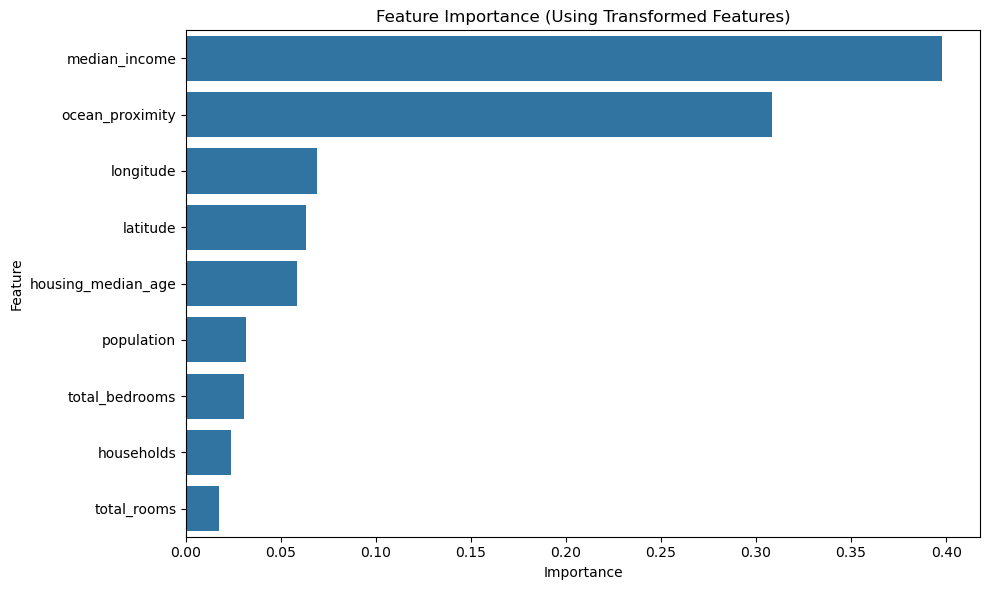

In [259]:
plt.figure(figsize=(10, 6))
sns.barplot(feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance (Using Transformed Features)')
plt.tight_layout()
plt.show()

> ## **Model Interpretation**

In [260]:
y_test_values = np.array(y_test).flatten()
y_pred_values = np.array(y_pred).flatten()

df_error = pd.DataFrame({
    'Actual_Price': y_test_values,
    'Predicted_Price': y_pred_values,
    'Error': y_test_values - y_pred_values
})
df_error

Actual_Price  Predicted_Price     Error
0         115400.0        135615.00 -20215.00
1         166100.0        146739.00  19361.00
2         202900.0        190935.00  11965.00
3         138000.0        138807.00   -807.00
4         231800.0        209549.00  22251.00
...            ...              ...       ...
2885      123600.0        136118.00 -12518.00
2886      184500.0        178525.00   5975.00
2887      280800.0        282927.02  -2127.02
2888      137500.0        162388.00 -24888.00
2889      273600.0        242252.00  31348.00

[2890 rows x 3 columns]

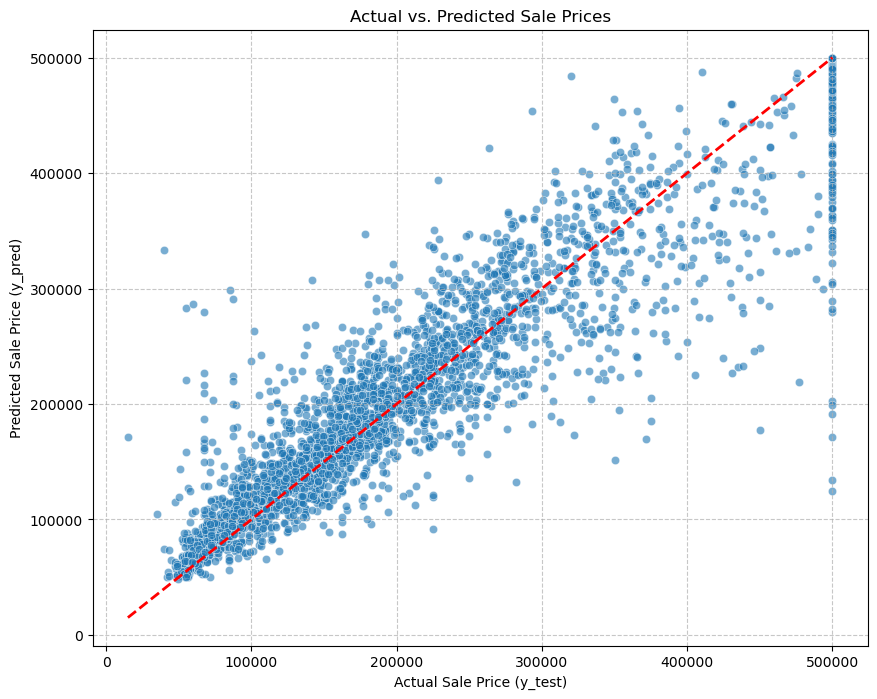

In [261]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test_values, y=y_pred_values, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sale Price (y_test)")
plt.ylabel("Predicted Sale Price (y_pred)")
plt.title("Actual vs. Predicted Sale Prices")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().ticklabel_format(style='plain', axis='x', useOffset=False)
plt.gca().ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

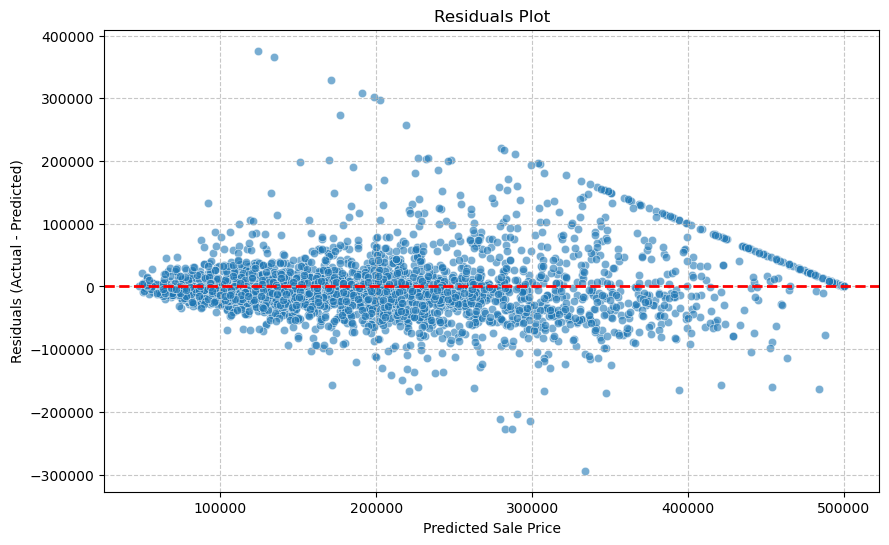

In [262]:
residuals = y_test_values - y_pred_values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Zero residual line
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().ticklabel_format(style='plain', axis='x', useOffset=False)
plt.show()

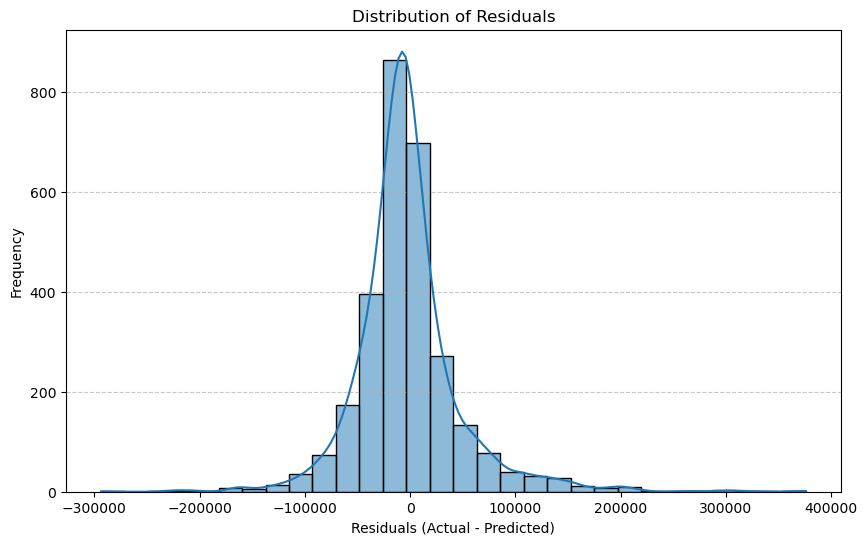

In [263]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> ## **SHAP**

In [264]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test_transformed_df)

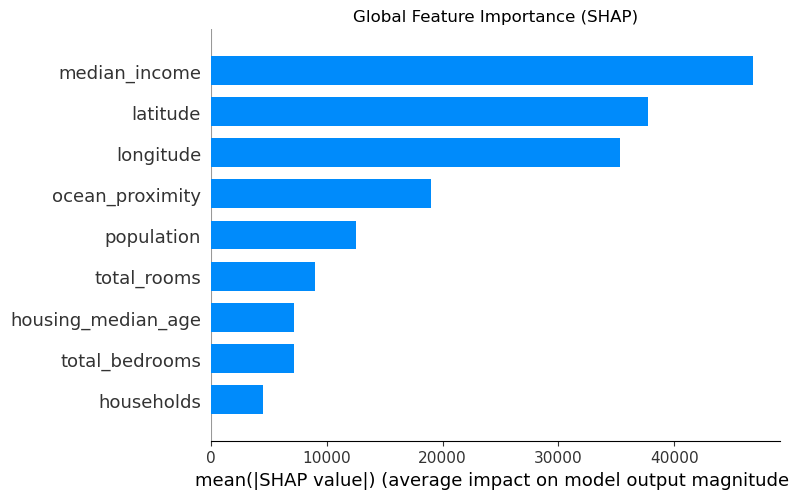

In [265]:
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", 
                 feature_names=cleaned_feature_names, show=False)
plt.title("Global Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

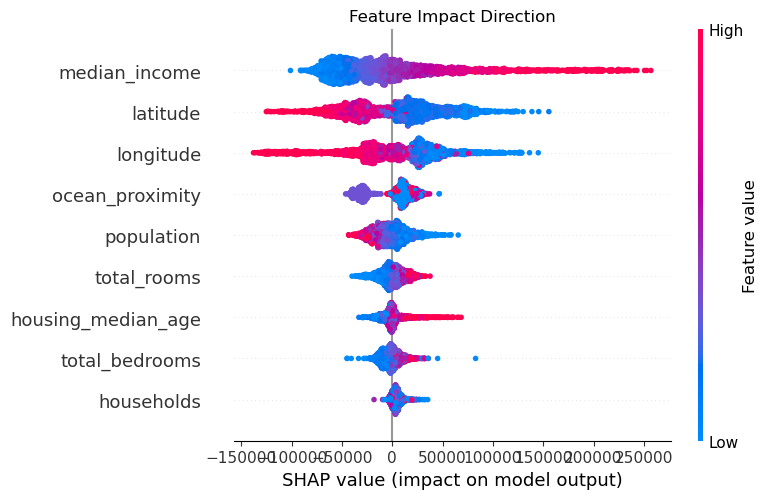

In [266]:
shap.summary_plot(shap_values, X_test_transformed_df, 
                 feature_names=cleaned_feature_names, show=False)
plt.title("Feature Impact Direction")
plt.tight_layout()
plt.show()

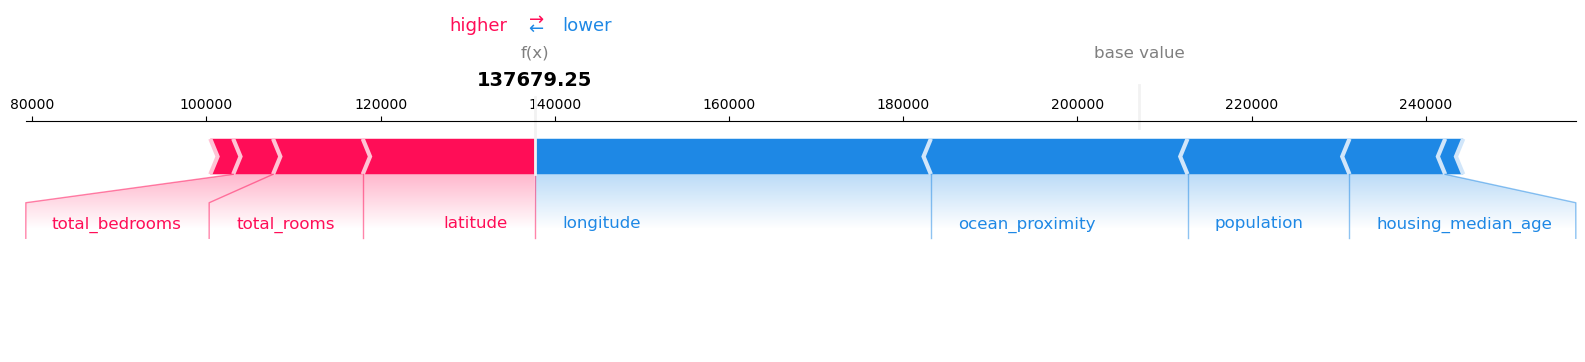

<Figure size 640x480 with 0 Axes>

In [267]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], 
                features=cleaned_feature_names,
                matplotlib=True)
plt.tight_layout()
plt.show()

> ## **Partial Dependence Display**

In [268]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

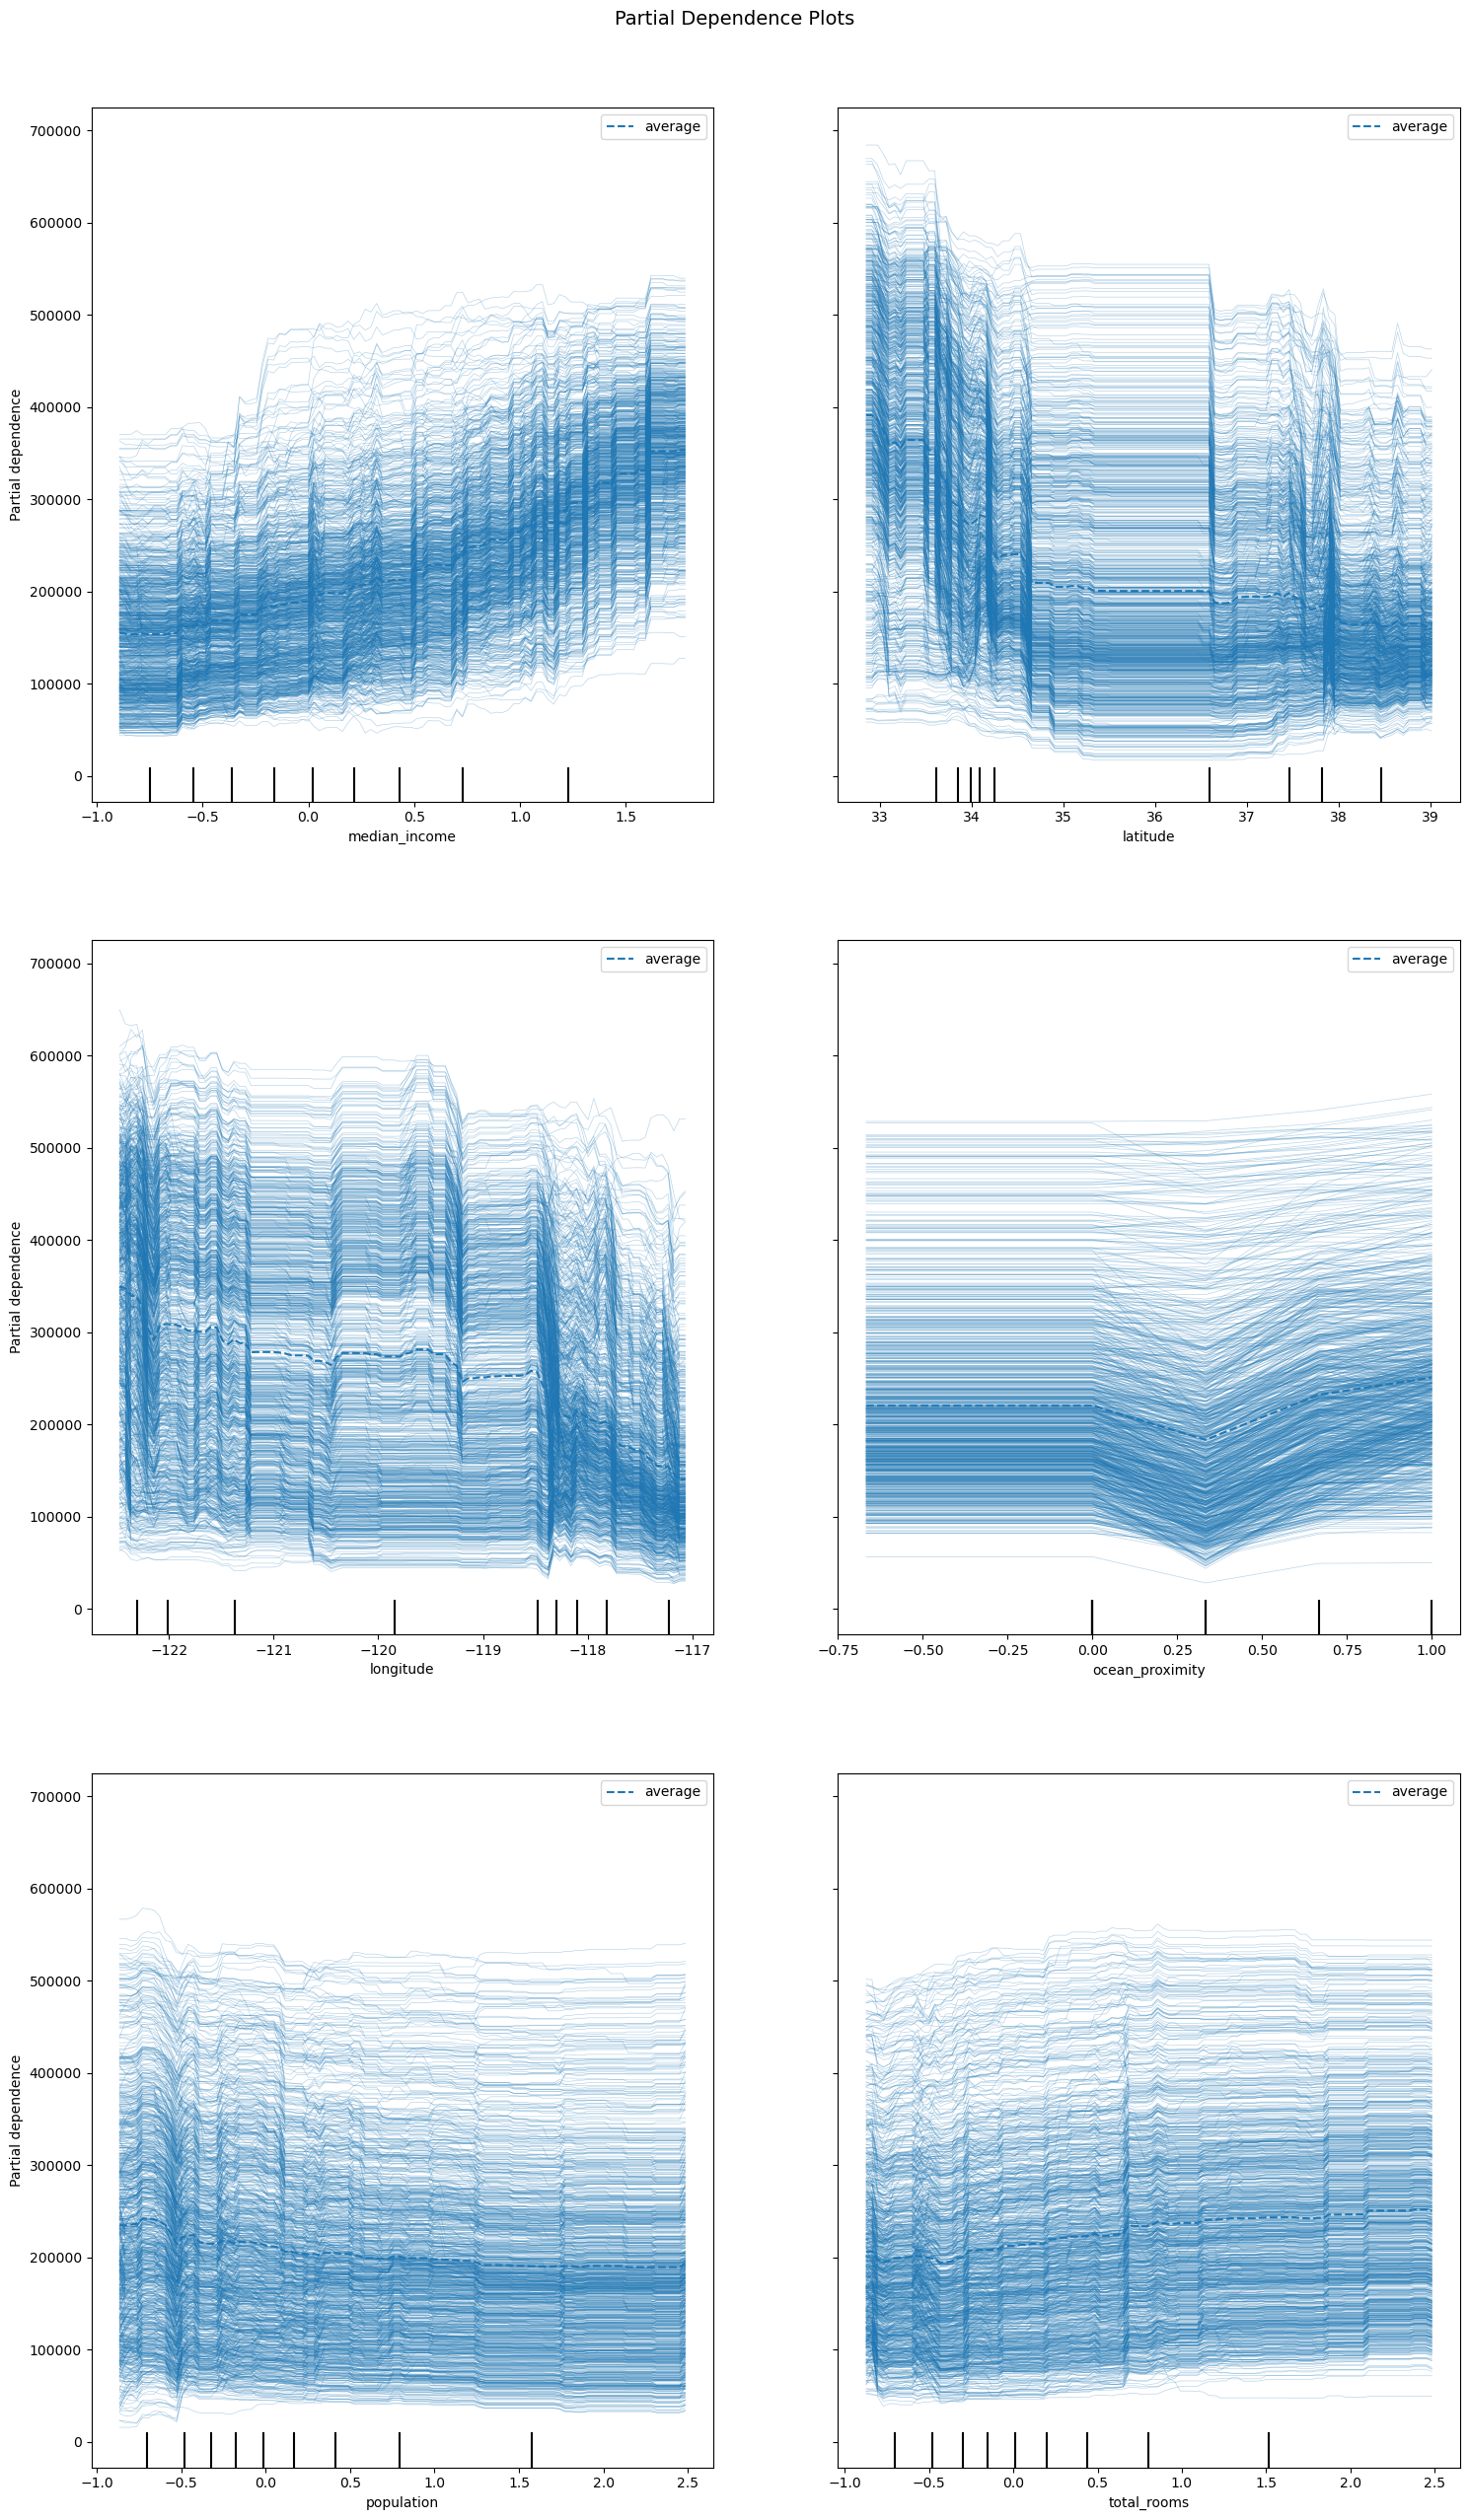

In [269]:
def plot_pdps(model, X_transformed, feature_names, features_to_plot=None, n_cols=3):

    if features_to_plot is None:
        features_to_plot = feature_names
    
    feature_indices = [feature_names.index(f) for f in features_to_plot]
    
    fig, ax = plt.subplots(figsize=(15, 25))
    PartialDependenceDisplay.from_estimator(
        model,
        X_transformed,
        features=feature_indices,
        feature_names=feature_names,
        kind='both',
        n_cols=n_cols,
        ax=ax,
        random_state=42
    )
    plt.suptitle("Partial Dependence Plots", y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

plot_pdps(
    best_model.named_steps['model'],
    X_test_transformed_df,
    cleaned_feature_names,
    features_to_plot=['median_income', 'latitude', 'longitude', 'ocean_proximity', 
                     'population', 'total_rooms'],
    n_cols=2
)

> ## **Saving Final Model**

In [270]:
final_model = best_model

In [271]:
final_model.fit(X_train, y_train)
test_score = final_model.score(X_test, y_test)

final_model.fit(X, y)
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [272]:
import pickle

pickle.dump(final_model, open('final_model.sav','wb'))

> ## **Conclusions**

> **Model Performance Evaluation**

In [273]:
print(f"RMSE: {tuned_rmse:.5f}")
print(f"MAE: {tuned_mae:.5f}")
print(f"R²: {tuned_r2:.5f}")
print(f"MAPE: {tuned_mape:.5f}")

RMSE: 47325.05223
MAE: 31444.81179
R²: 0.83225
MAPE: 17.79787


> **Business Interpretation**

> **Limitations & Recommendations**
